# Grade Insight: PCA-Driven Analysis

In [21]:
import math
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [22]:
A = np.zeros((0,6))
with open("scores128A", "r") as fp:
    for line in fp:
        fields = np.array(line.split(),dtype=float)
        A = np.vstack((A, fields))

In [23]:
# Get the dimensions of the matrix
m, n = A.shape
print(f"Matrix dimensions: {m} rows (students) x {n} columns (assignment types)")

Matrix dimensions: 230 rows (students) x 6 columns (assignment types)


In [24]:
# Lecture 30 page 4 Step 1: Compute column means (μ_j)
mu = np.mean(A, axis=0)
print("\nColumn means (μ_j):")
print(mu)


Column means (μ_j):
[85.8194 85.7377 78.3975 78.462  77.5261 77.1409]


In [25]:
# Lecture 30 page 4 Step 2: Create mean-centered data (Ã)
Atil = A - mu

In [26]:
# Lecture 30 page 4 Step 4: Compute the compact SVD of Ã/√(m-1)
Atmp = Atil / math.sqrt(m-1)
U, s, V = linalg.svd(Atmp, 0)  # 0 for compact SVD
V = V.T
S = np.diag(s)
print("\nVerifying SVD accuracy (should be close to 0):")
print(linalg.norm(Atmp - U @ S @ V.T))


Verifying SVD accuracy (should be close to 0):
2.5762360736489947e-14


In [16]:
# Calculate the weights for the total score
g = np.array([0.06, 0.12, 0.12, 0.20, 0.20, 0.30])
gamma = V.T @ g

In [17]:
# Adjust the signs of columns of U and V for which γ_j is negative
for j in range(len(gamma)):
    if gamma[j] < 0:
        U[:, j] = -U[:, j]
        V[:, j] = -V[:, j]

# Recompute gamma after sign adjustments
gamma = V.T @ g

# Print results with limited decimal places
np.set_printoptions(precision=4)

print("\nWeights of principal components toward final grade (γ_j):")
print(gamma)

print("\nStandard deviations of principal components (σ_j):")
print(s)

print("\nChange of variables matrix V (columns are coefficients of Y_j in terms of X_i):")
print(V)


Weights of principal components toward final grade (γ_j):
[0.3983 0.1397 0.0097 0.0156 0.1091 0.1096]

Standard deviations of principal components (σ_j):
[33.9626 17.4083 14.6169  8.4833  7.5869  6.4967]

Change of variables matrix V (columns are coefficients of Y_j in terms of X_i):
[[ 0.338  -0.5297 -0.7744 -0.054   0.0294  0.0413]
 [ 0.4961 -0.5968  0.6257 -0.0245  0.0536 -0.0526]
 [ 0.4158  0.2282 -0.0484  0.5932 -0.6282 -0.1617]
 [ 0.3255  0.2882 -0.0726  0.2817  0.7123 -0.468 ]
 [ 0.4842  0.4009 -0.0266 -0.7387 -0.1913 -0.148 ]
 [ 0.3555  0.2596  0.0225  0.1399  0.2402  0.8535]]


In [18]:
# Calculate the Y scores for each student
B = A @ V  # Y = XV

# Rescale the columns of B by their weight toward the final grade
B_tilde = B * gamma

# Calculate the final score for each student
scores = A @ g 

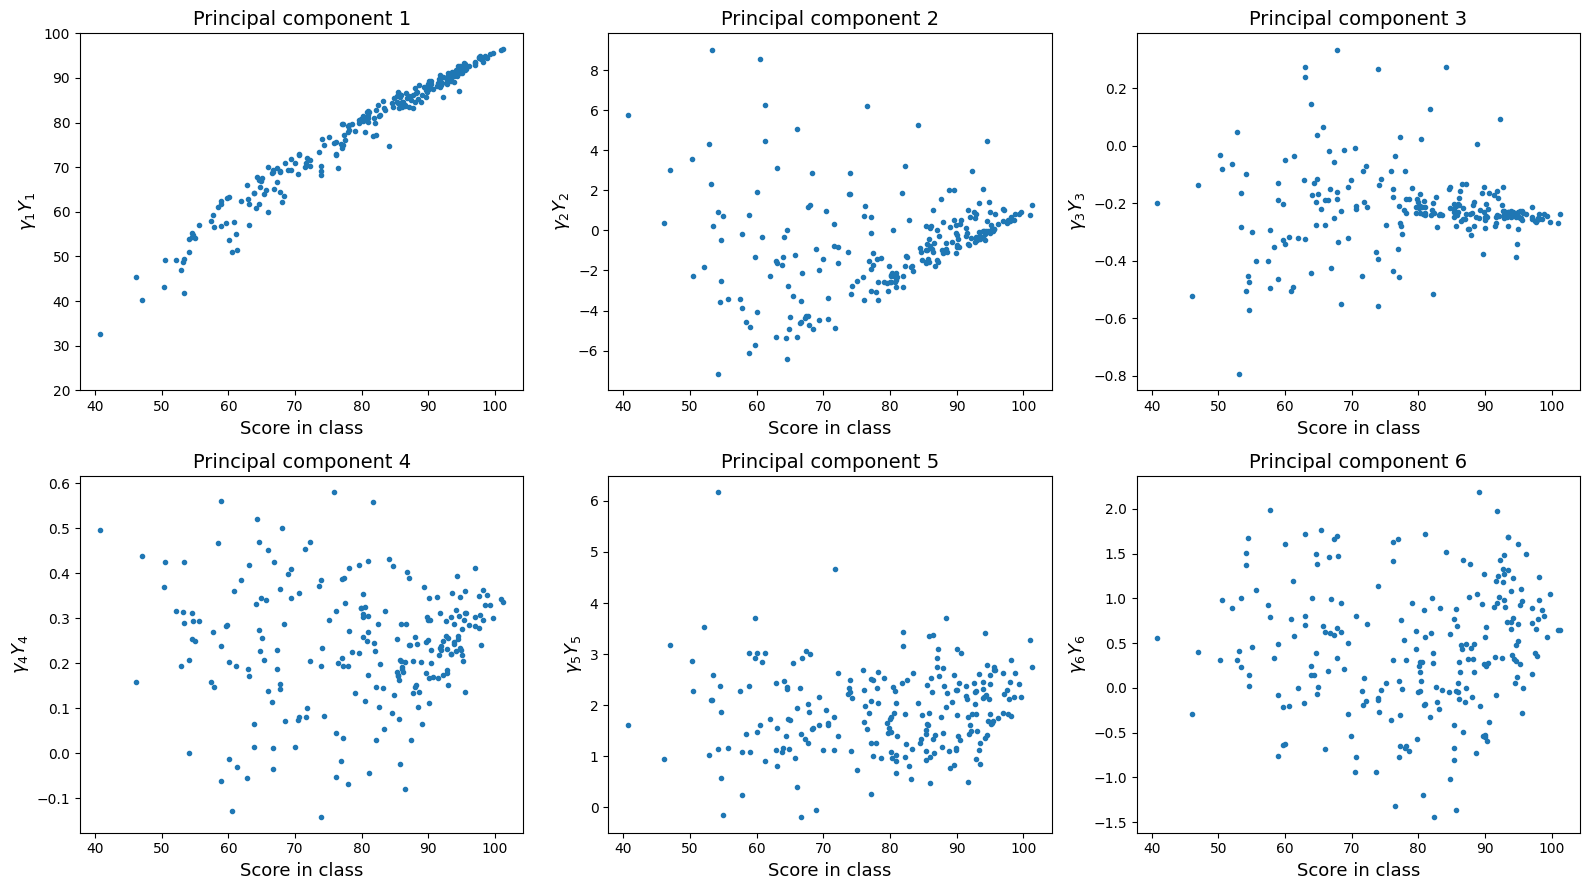

In [19]:
# Make scatter plots
plt.figure(figsize=(16, 9))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.scatter(scores, B_tilde[:, i], marker='.')
    plt.title(f"Principal component {i+1}", fontsize=14)
    plt.xlabel("Score in class", fontsize=13)
    plt.ylabel(f"$\\gamma_{i+1}Y_{i+1}$", fontsize=13)
    if i == 0:
        plt.ylim((20, 100))
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.tight_layout()
plt.savefig('pca_scatter_plots.png')
plt.show()

In [27]:
# Print information about variance
total_variance = np.sum(s**2)
variance_explained = s**2 / total_variance
cumulative_variance = np.cumsum(variance_explained)

print("\nVariance explained by each principal component:")
for i in range(len(s)):
    print(f"PC{i+1}: {variance_explained[i]*100:.2f}% (Cumulative: {cumulative_variance[i]*100:.2f}%)")


Variance explained by each principal component:
PC1: 62.62% (Cumulative: 62.62%)
PC2: 16.45% (Cumulative: 79.08%)
PC3: 11.60% (Cumulative: 90.68%)
PC4: 3.91% (Cumulative: 94.58%)
PC5: 3.13% (Cumulative: 97.71%)
PC6: 2.29% (Cumulative: 100.00%)
